In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('HR.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

**Exploratory Data Analysis**

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

***Check for duplicates***

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape 

(1470, 35)

There is no change in shape so there are no duplicates

***Check for null values***

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values

***Separate categorical and numerical column***

In [10]:
categorical_cols=[]
numerical_cols=[]
for x in df.columns:
    if df.dtypes[x]== 'object' :
        categorical_cols.append(x)
    elif df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        numerical_cols.append(x)

You can see the above plots there is skewness in every columns except "Average price" in the above data

***check for outliers***

Age                            Axes(0.125,0.786098;0.133621x0.0939024)
DailyRate                   Axes(0.285345,0.786098;0.133621x0.0939024)
DistanceFromHome             Axes(0.44569,0.786098;0.133621x0.0939024)
Education                   Axes(0.606034,0.786098;0.133621x0.0939024)
EmployeeCount               Axes(0.766379,0.786098;0.133621x0.0939024)
EmployeeNumber                 Axes(0.125,0.673415;0.133621x0.0939024)
EnvironmentSatisfaction     Axes(0.285345,0.673415;0.133621x0.0939024)
HourlyRate                   Axes(0.44569,0.673415;0.133621x0.0939024)
JobInvolvement              Axes(0.606034,0.673415;0.133621x0.0939024)
JobLevel                    Axes(0.766379,0.673415;0.133621x0.0939024)
JobSatisfaction                Axes(0.125,0.560732;0.133621x0.0939024)
MonthlyIncome               Axes(0.285345,0.560732;0.133621x0.0939024)
MonthlyRate                  Axes(0.44569,0.560732;0.133621x0.0939024)
NumCompaniesWorked          Axes(0.606034,0.560732;0.133621x0.0939024)
Percen

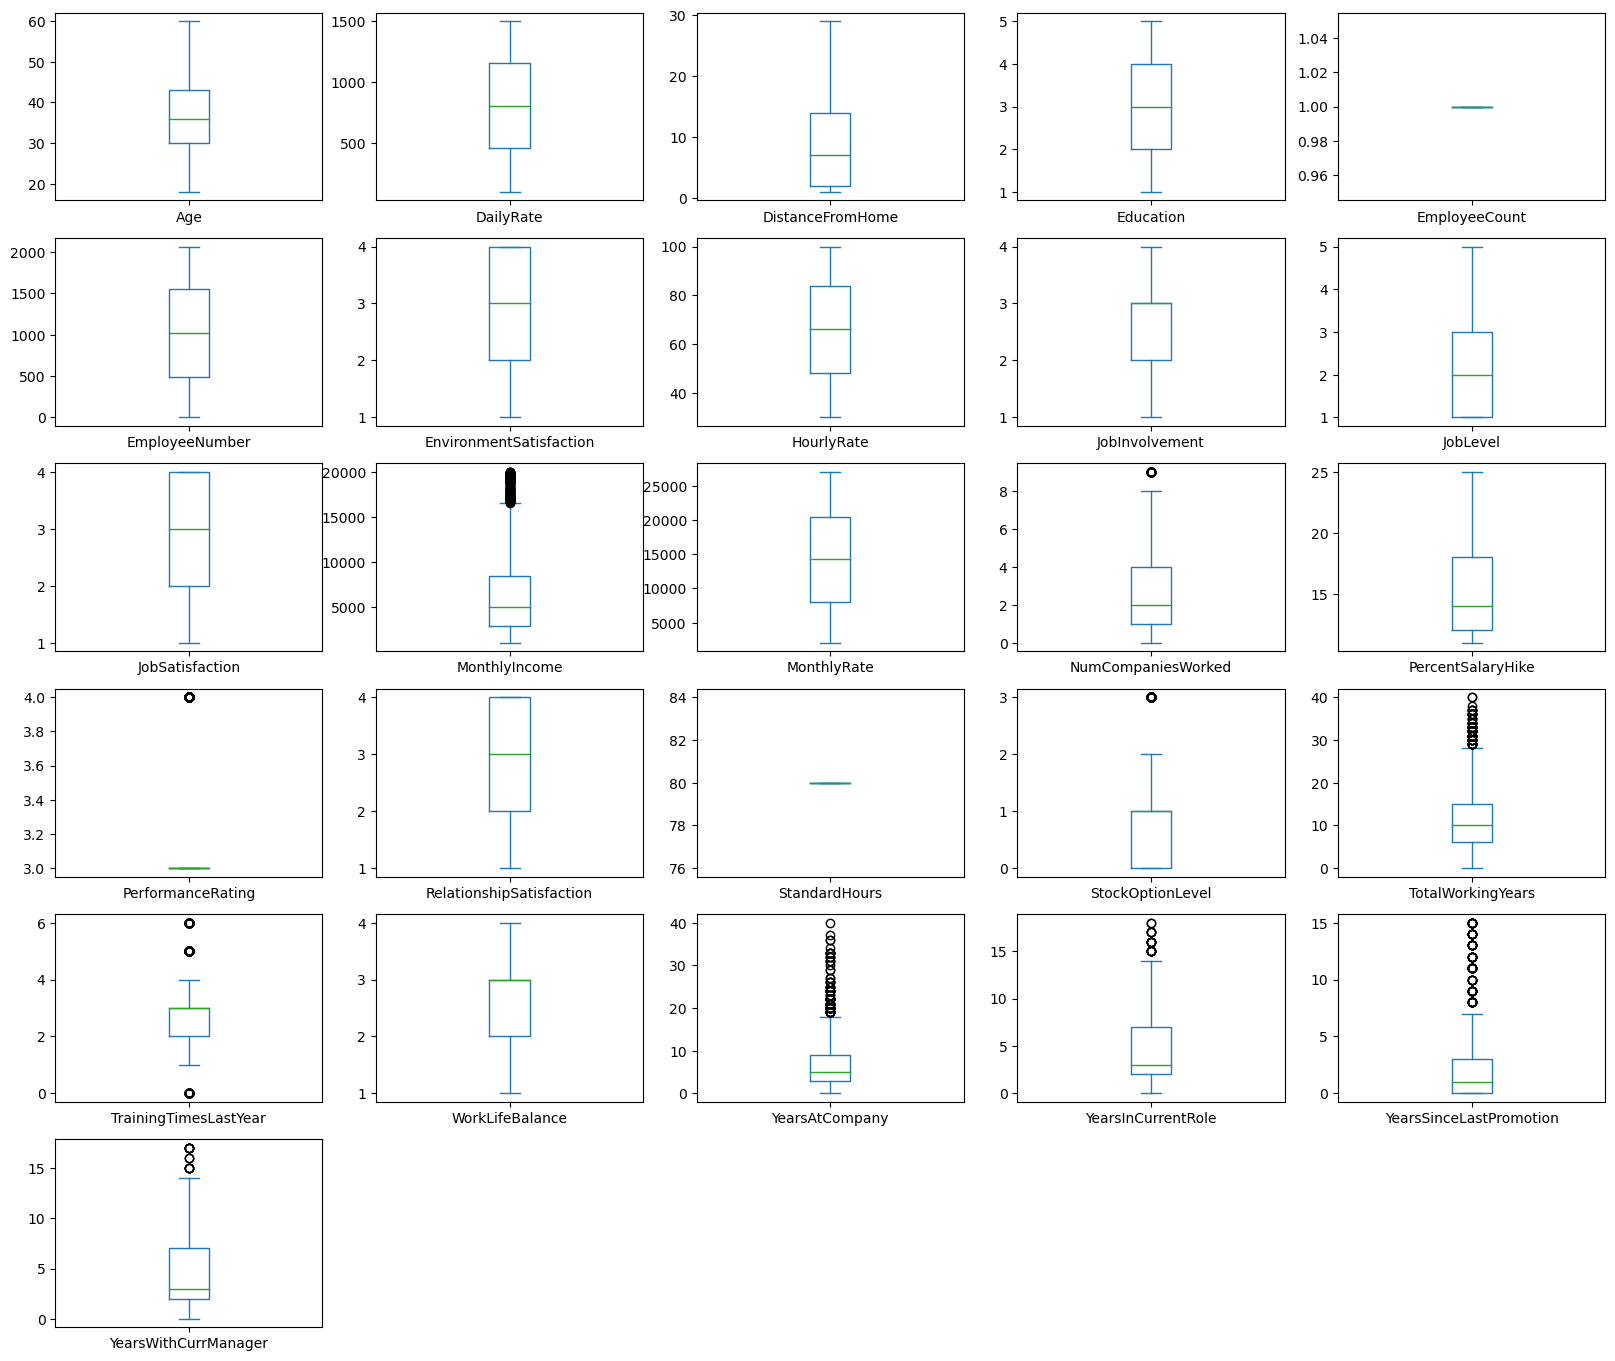

In [11]:
df[numerical_cols].plot(kind='box',subplots=True,layout=(7,5),figsize=(20,20))

In [12]:
for i in numerical_cols:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df

10.5
62.5
-573.0
2195.0
-16.0
32.0
-1.0
7.0
1.0
1.0
-1105.5
3152.5
-1.0
7.0
-5.625
137.375
0.5
4.5
-2.0
6.0
-1.0
7.0
-5291.0
16581.0
-10574.75
39083.25
-3.5
8.5
3.0
27.0
3.0
3.0
-1.0
7.0
80.0
80.0
-1.5
2.5
-7.5
28.5
0.5
4.5
0.5
4.5
-6.0
18.0
-5.5
14.5
-4.5
7.5
-5.5
14.5


Age                            Axes(0.125,0.786098;0.133621x0.0939024)
DailyRate                   Axes(0.285345,0.786098;0.133621x0.0939024)
DistanceFromHome             Axes(0.44569,0.786098;0.133621x0.0939024)
Education                   Axes(0.606034,0.786098;0.133621x0.0939024)
EmployeeCount               Axes(0.766379,0.786098;0.133621x0.0939024)
EmployeeNumber                 Axes(0.125,0.673415;0.133621x0.0939024)
EnvironmentSatisfaction     Axes(0.285345,0.673415;0.133621x0.0939024)
HourlyRate                   Axes(0.44569,0.673415;0.133621x0.0939024)
JobInvolvement              Axes(0.606034,0.673415;0.133621x0.0939024)
JobLevel                    Axes(0.766379,0.673415;0.133621x0.0939024)
JobSatisfaction                Axes(0.125,0.560732;0.133621x0.0939024)
MonthlyIncome               Axes(0.285345,0.560732;0.133621x0.0939024)
MonthlyRate                  Axes(0.44569,0.560732;0.133621x0.0939024)
NumCompaniesWorked          Axes(0.606034,0.560732;0.133621x0.0939024)
Percen

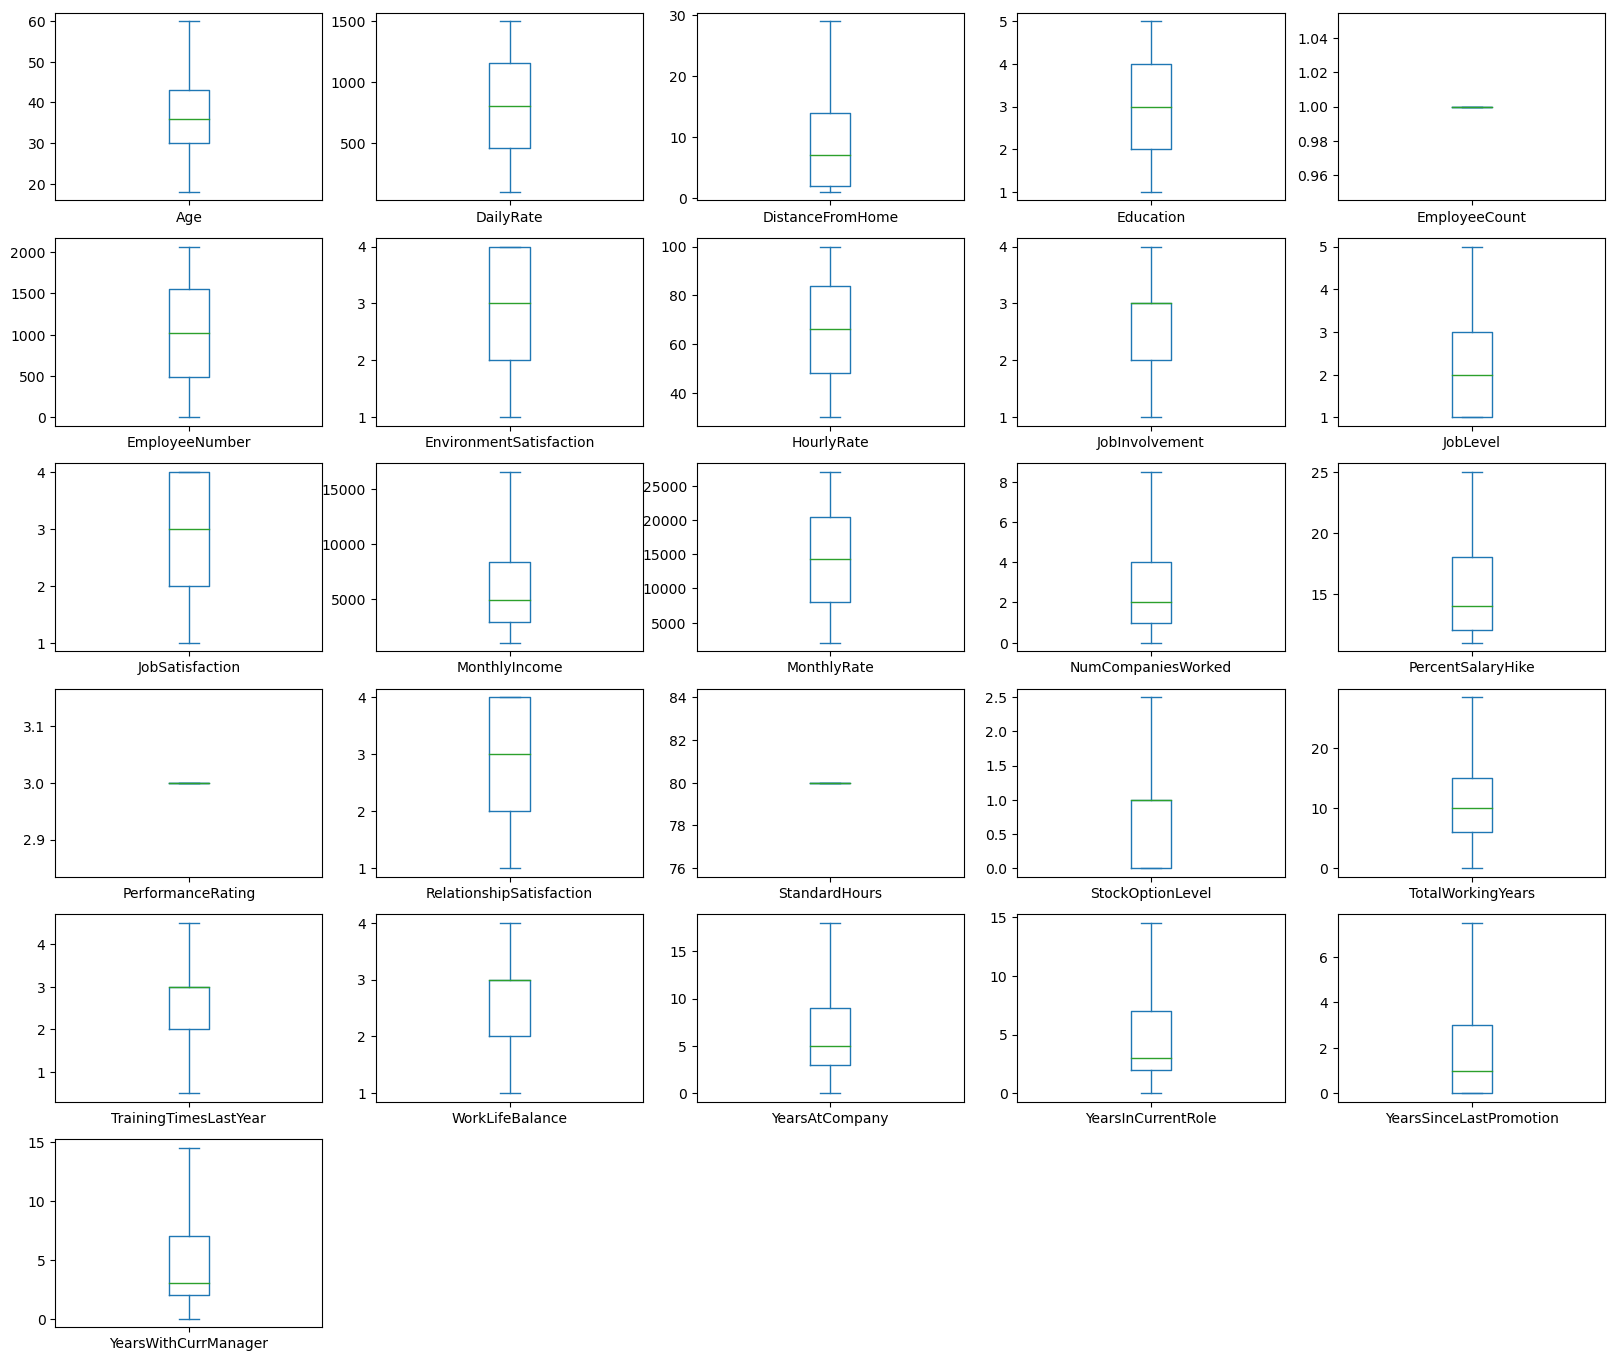

In [13]:
df[numerical_cols].plot(kind='box',subplots=True,layout=(7,5),figsize=(20,20))

So the outliers which are present in some of the features are also removed

***check for skewness***

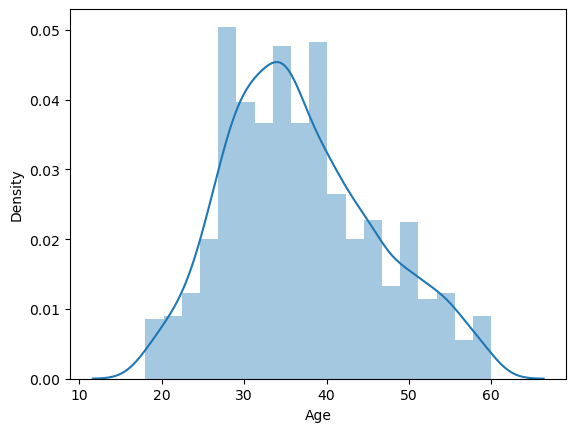

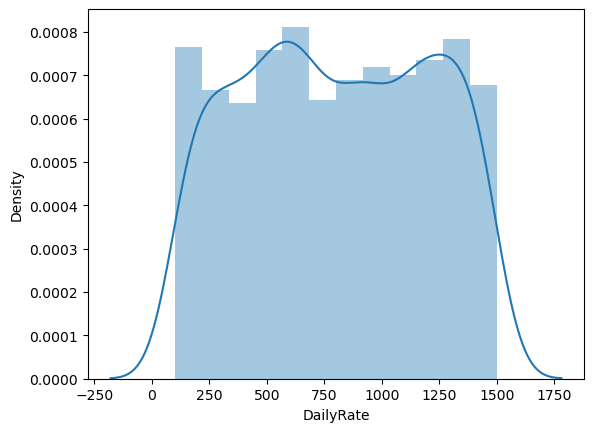

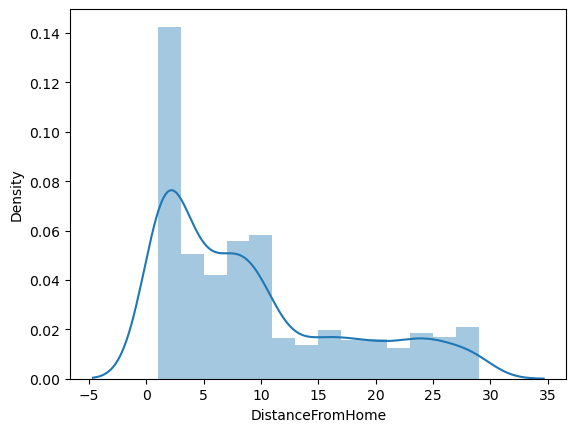

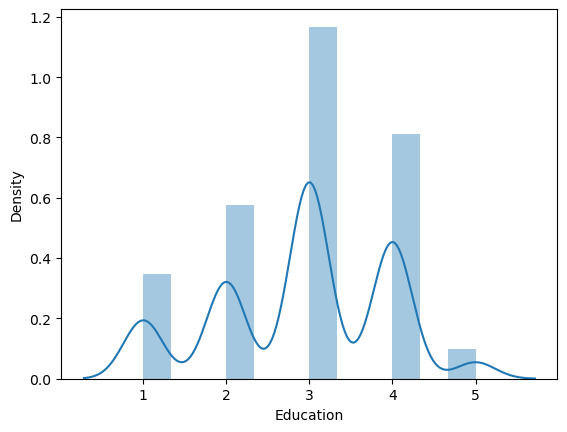

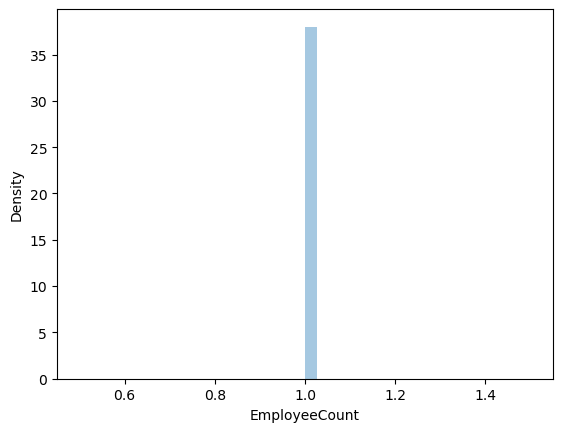

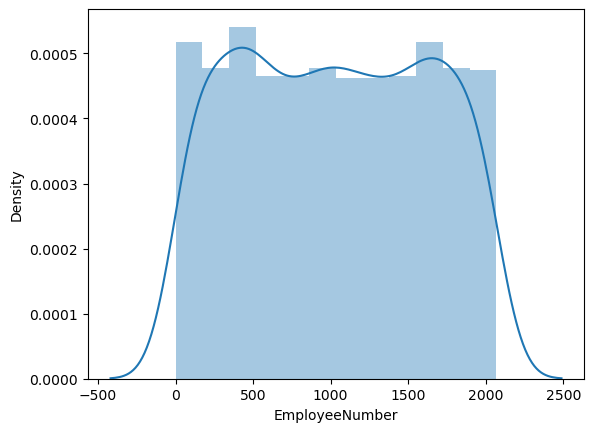

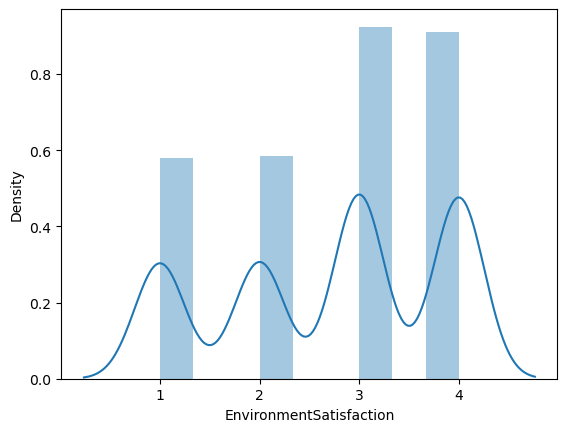

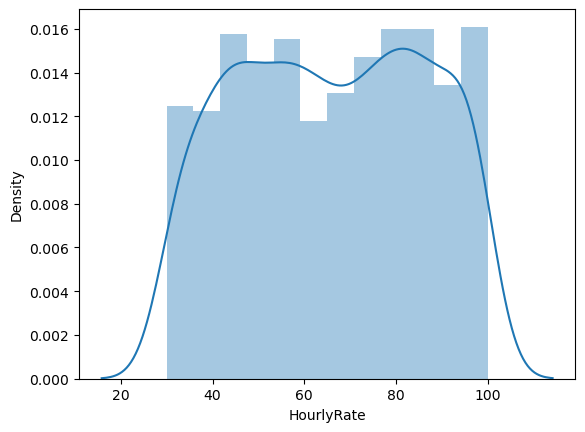

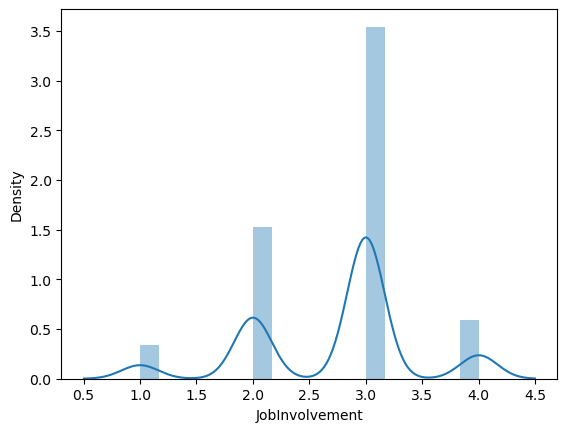

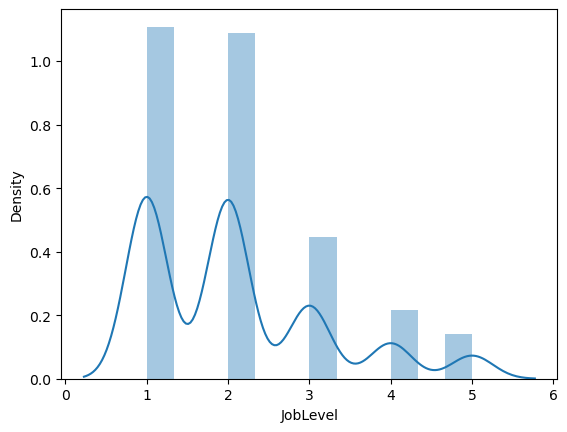

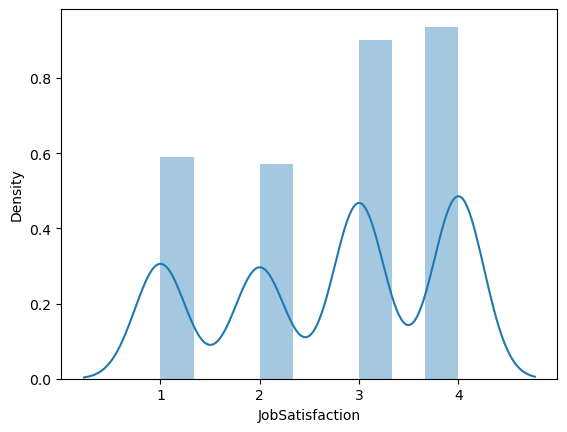

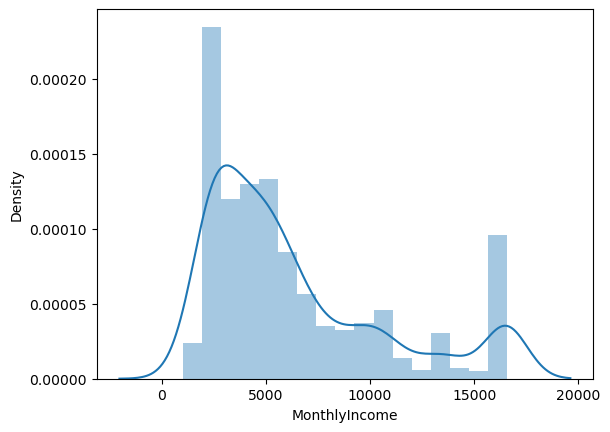

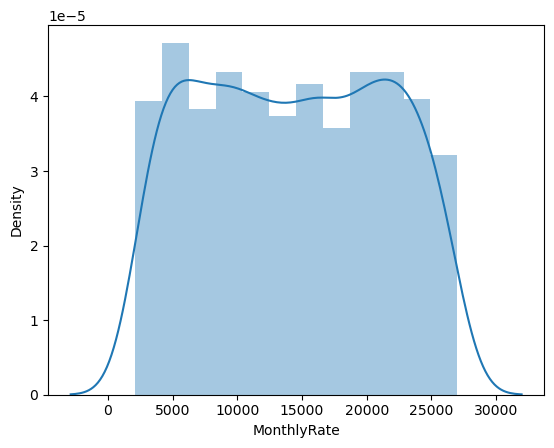

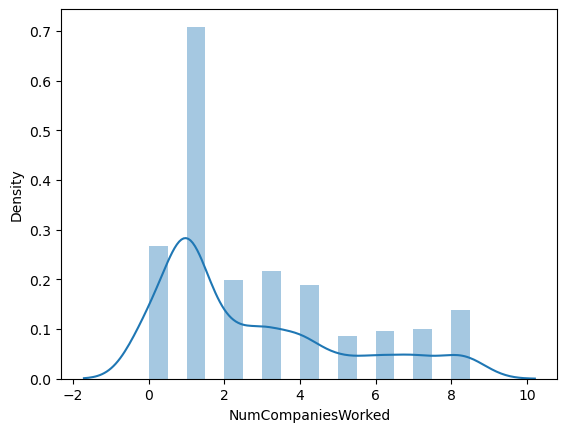

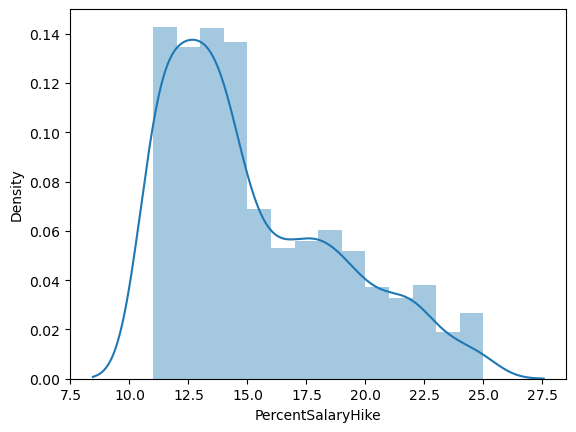

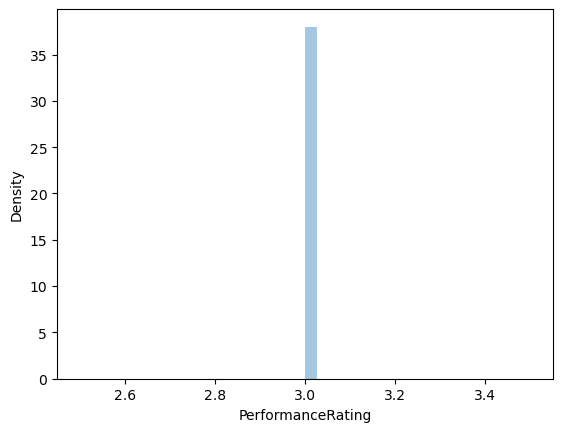

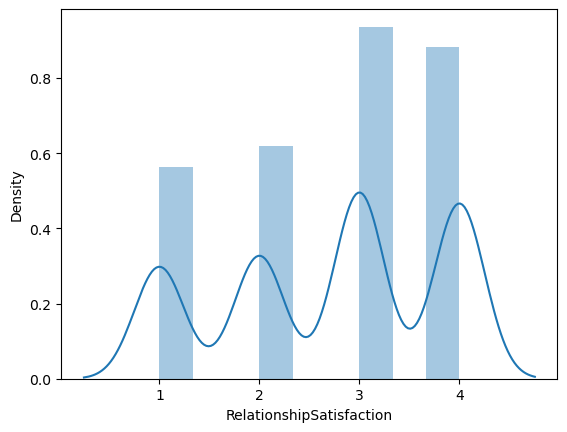

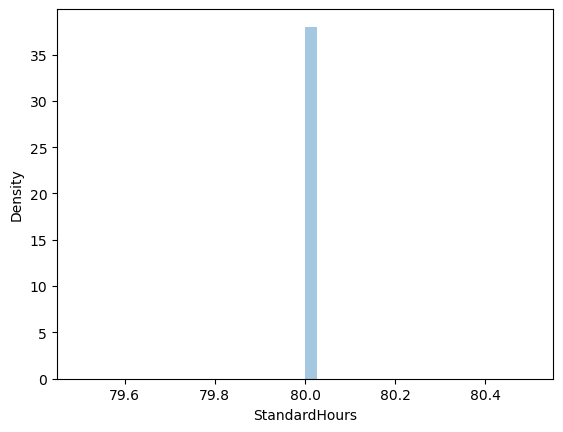

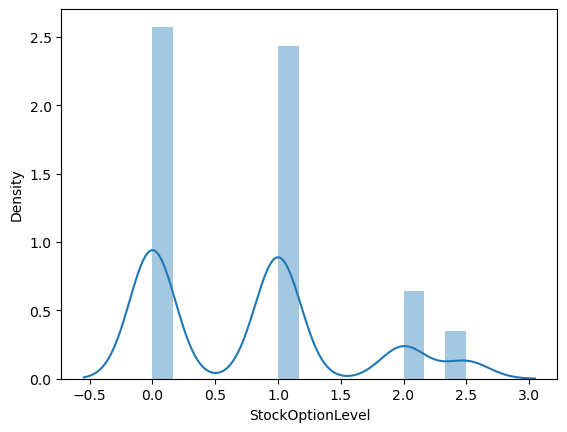

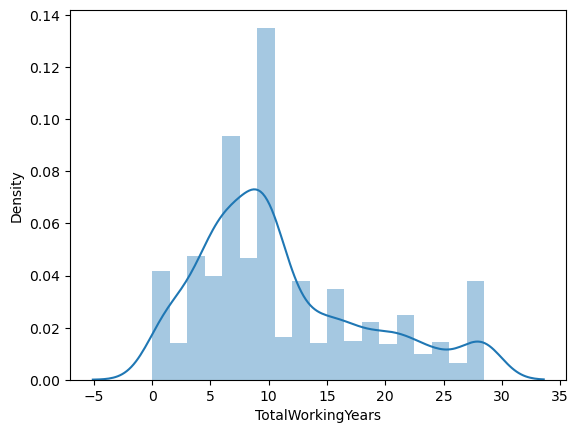

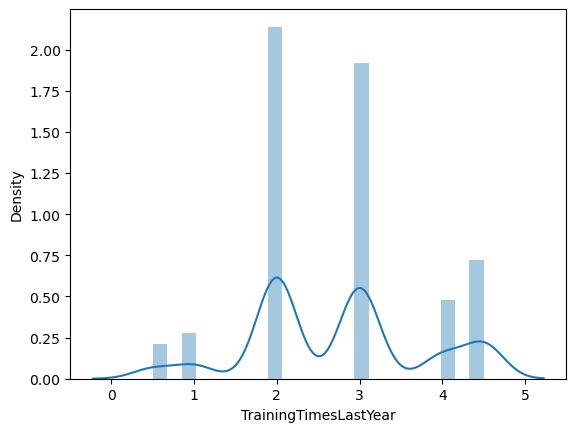

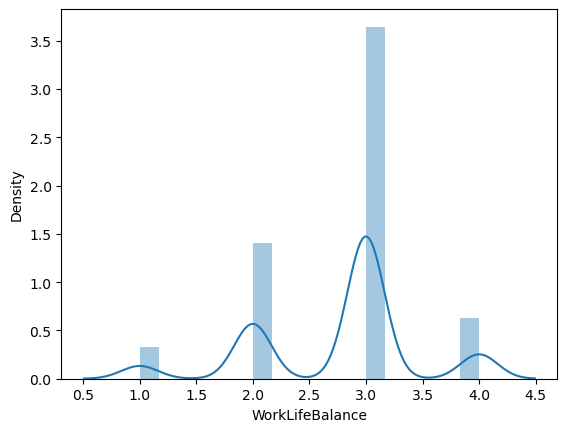

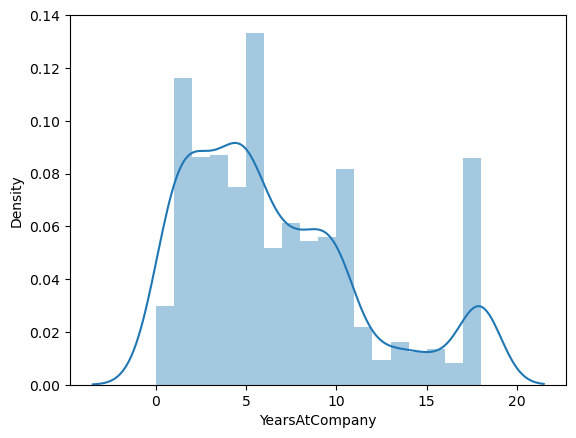

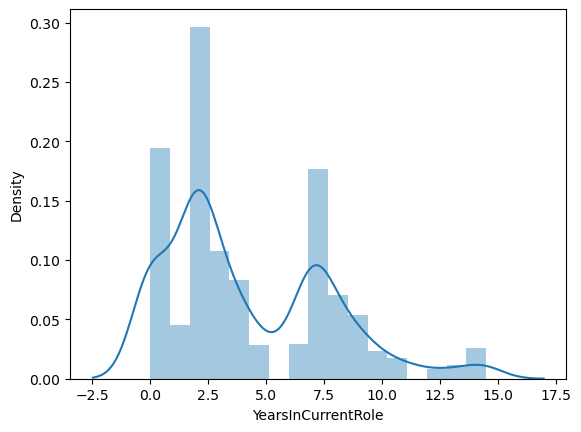

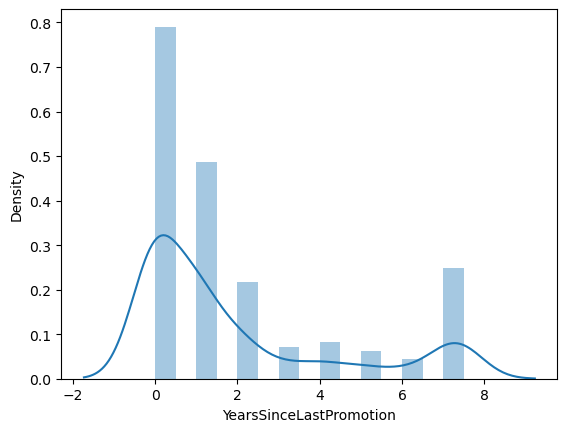

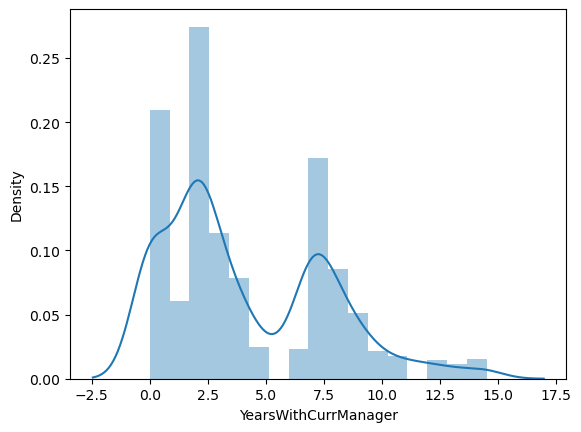

In [14]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

Transformation to get rid of skewness

In [15]:
for i in numerical_cols:
    df[i] = np.sqrt(df[i])

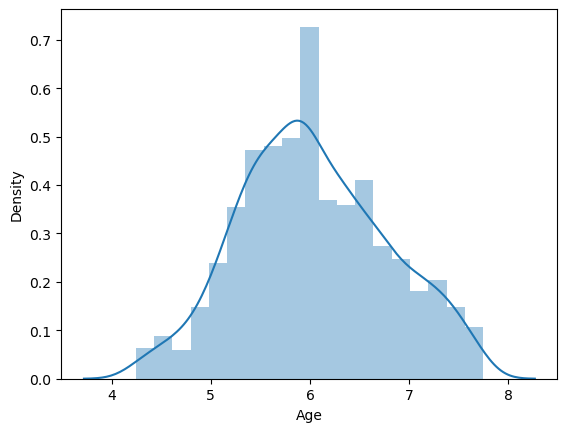

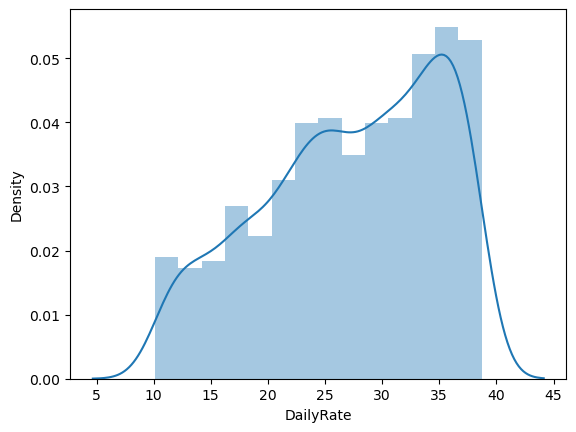

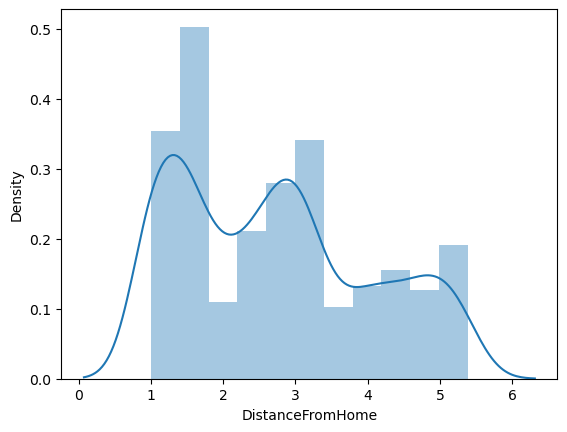

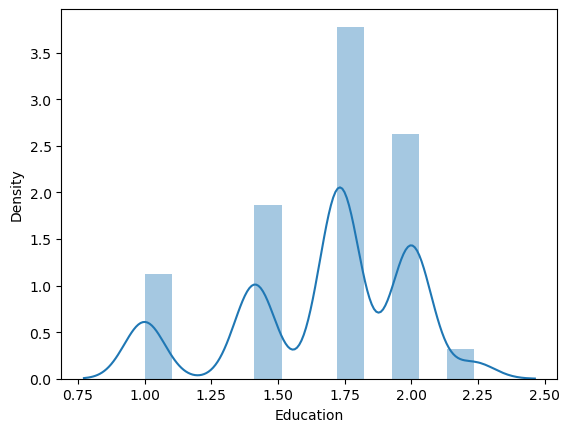

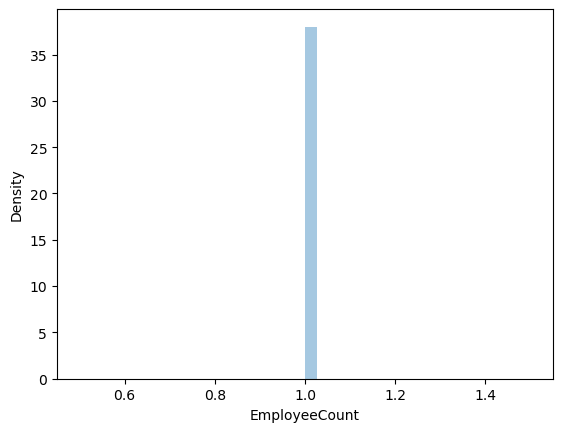

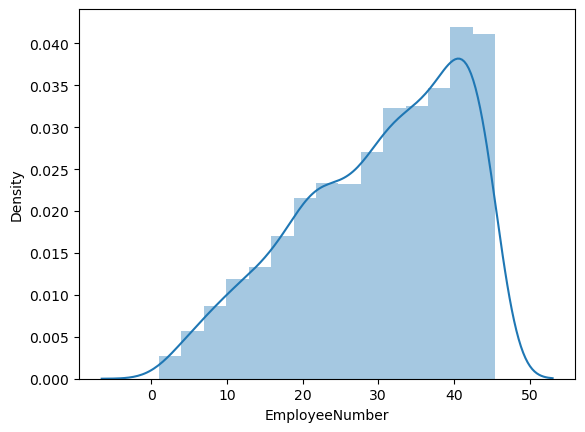

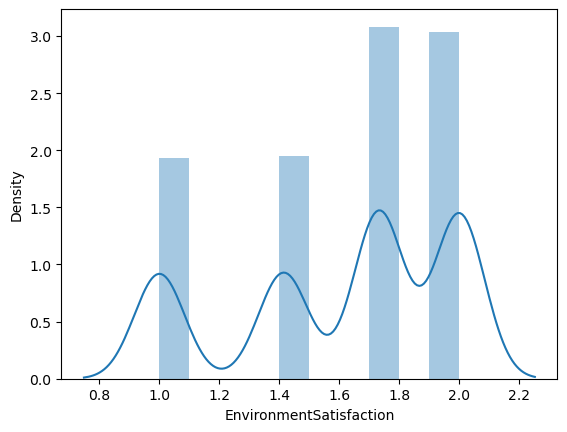

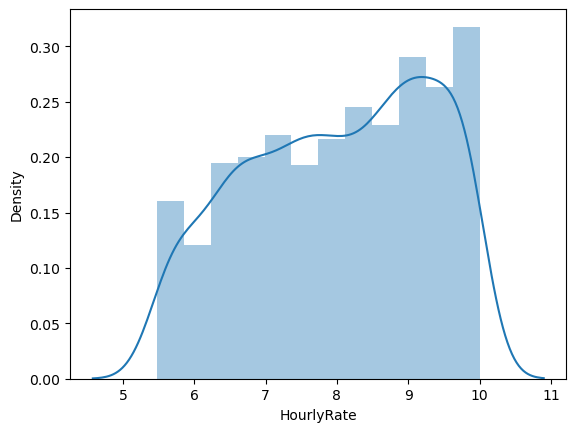

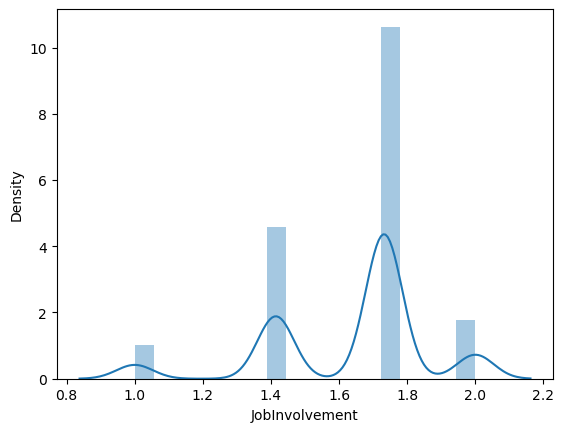

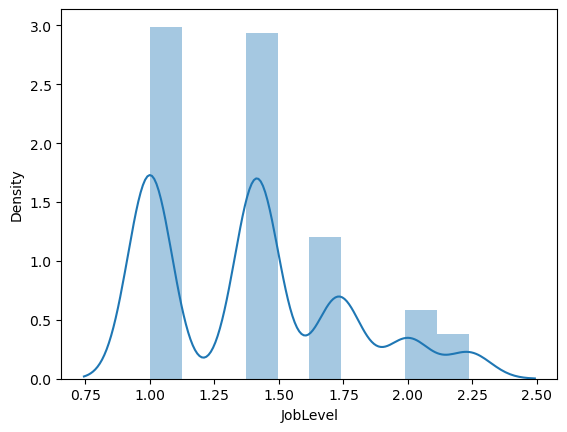

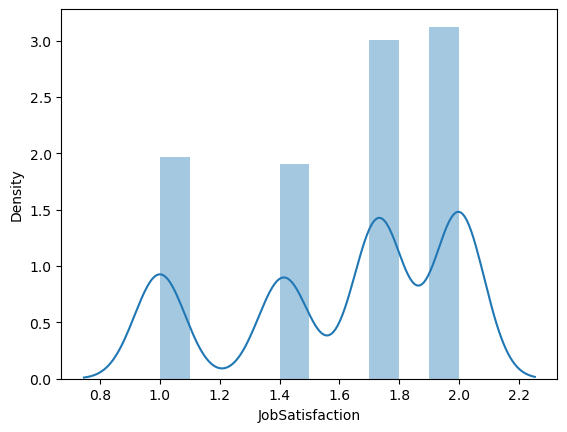

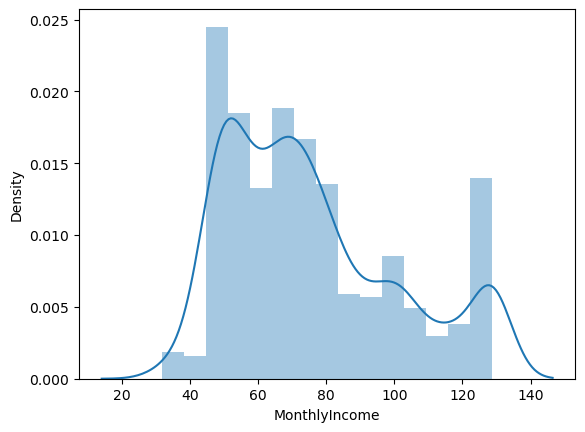

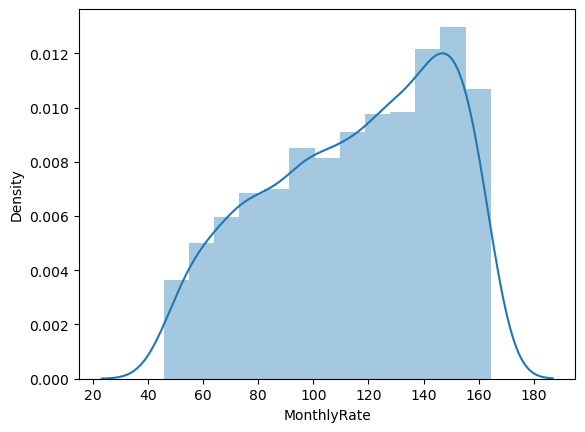

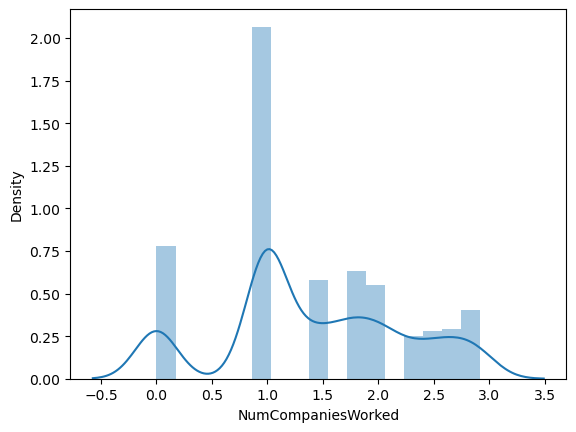

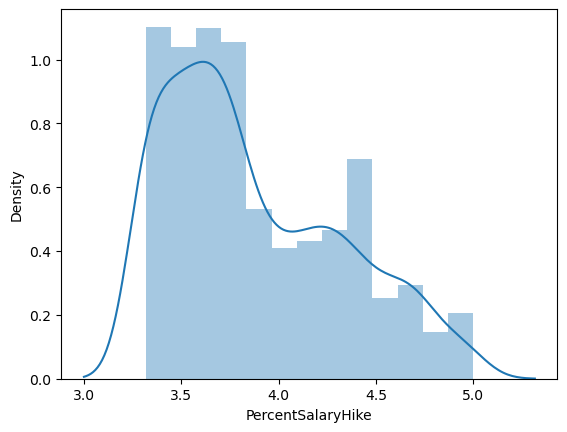

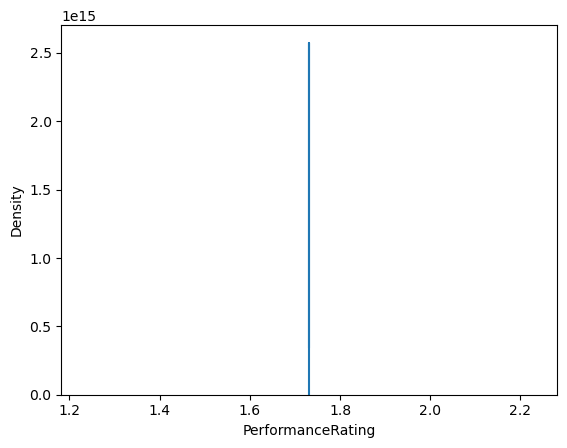

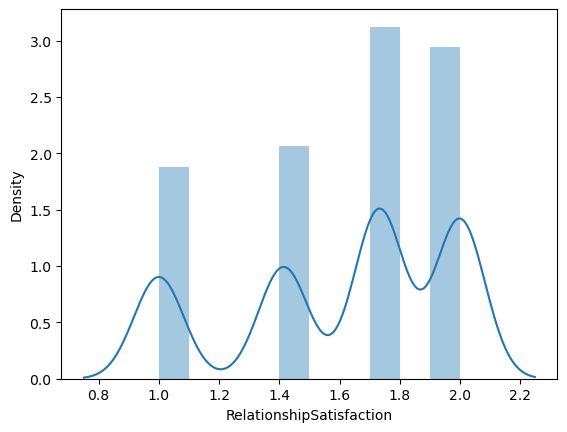

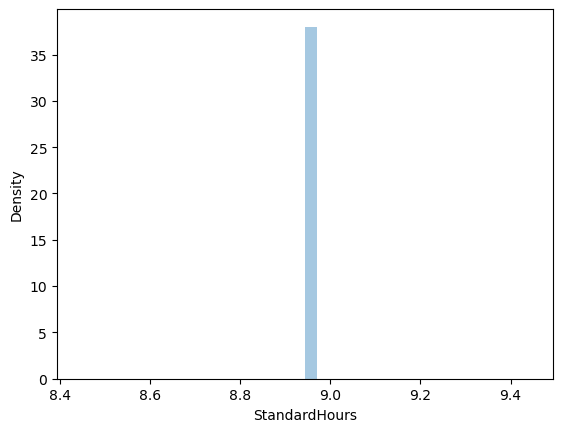

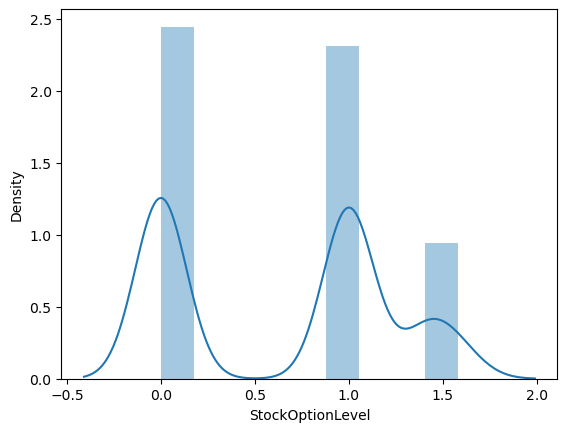

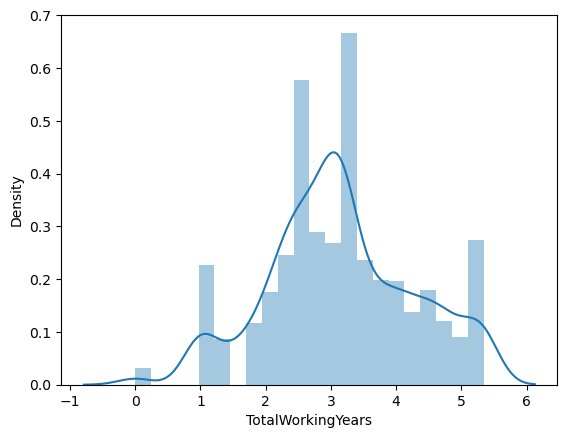

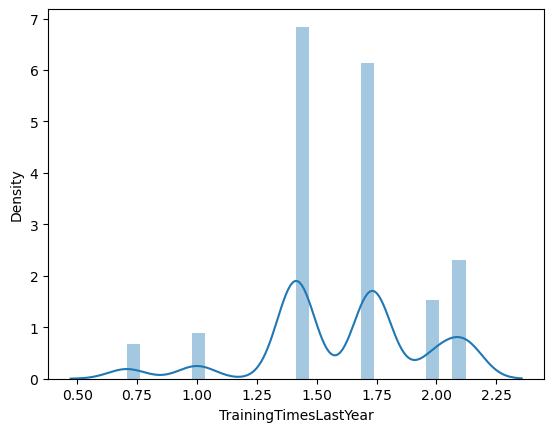

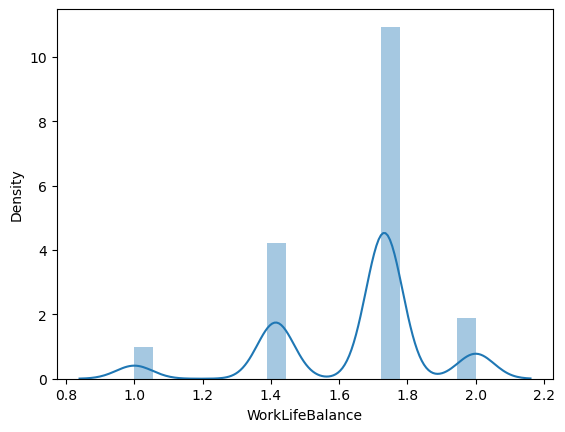

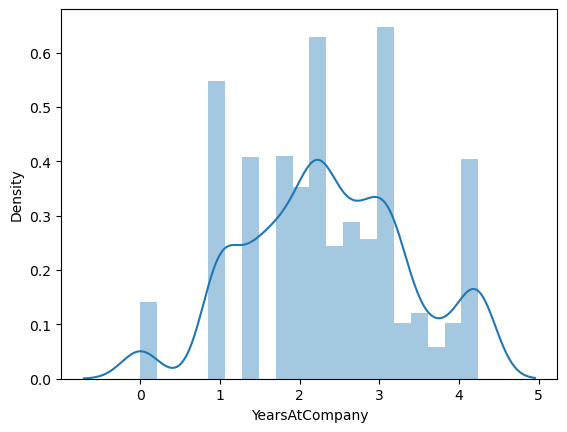

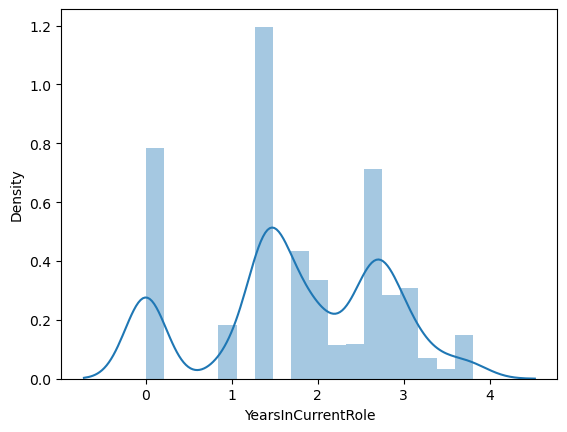

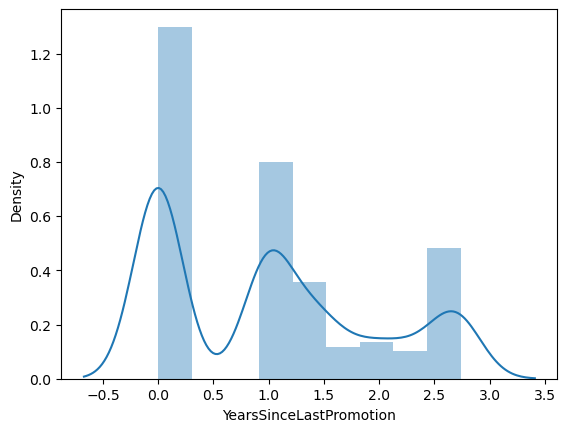

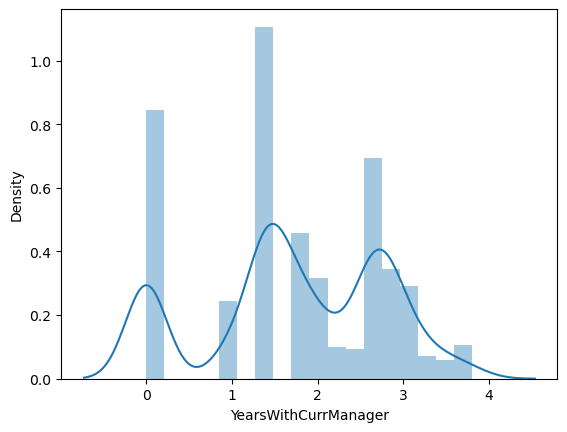

In [16]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

Skewness is managed

***Encoding of categorical column***

As the catrgorical data is nominal we can use nominal encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()

In [19]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,6.403124,1,2,33.196385,2,1.000000,1.414214,1,1.0,1.000000,...,1.000000,8.944272,0.0,2.828427,0.707107,1.000000,2.449490,2.000000,0.000000,2.236068
1,7.000000,0,1,16.703293,1,2.828427,1.000000,1,1.0,1.414214,...,2.000000,8.944272,1.0,3.162278,1.732051,1.732051,3.162278,2.645751,1.000000,2.645751
2,6.082763,1,2,37.054015,1,1.414214,1.414214,4,1.0,2.000000,...,1.414214,8.944272,0.0,2.645751,1.732051,1.732051,0.000000,0.000000,0.000000,0.000000
3,5.744563,0,1,37.309516,1,1.732051,2.000000,1,1.0,2.236068,...,1.732051,8.944272,0.0,2.828427,1.732051,1.732051,2.828427,2.645751,1.732051,0.000000
4,5.196152,0,2,24.310492,1,1.414214,1.000000,3,1.0,2.645751,...,2.000000,8.944272,1.0,2.449490,1.732051,1.732051,1.414214,1.414214,1.414214,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6.000000,0,1,29.732137,1,4.795832,1.414214,3,1.0,45.398238,...,1.732051,8.944272,1.0,4.123106,1.732051,1.732051,2.236068,1.414214,0.000000,1.732051
1466,6.244998,0,2,24.758837,1,2.449490,1.000000,3,1.0,45.409250,...,1.000000,8.944272,1.0,3.000000,2.121320,1.732051,2.645751,2.645751,1.000000,2.645751
1467,5.196152,0,2,12.449900,1,2.000000,1.732051,1,1.0,45.431267,...,1.414214,8.944272,1.0,2.449490,0.707107,1.732051,2.449490,1.414214,0.000000,1.732051
1468,7.000000,0,1,31.984371,2,1.414214,1.732051,3,1.0,45.442271,...,2.000000,8.944272,0.0,4.123106,1.732051,1.414214,3.000000,2.449490,0.000000,2.828427


***Check for Correlation between feautures***

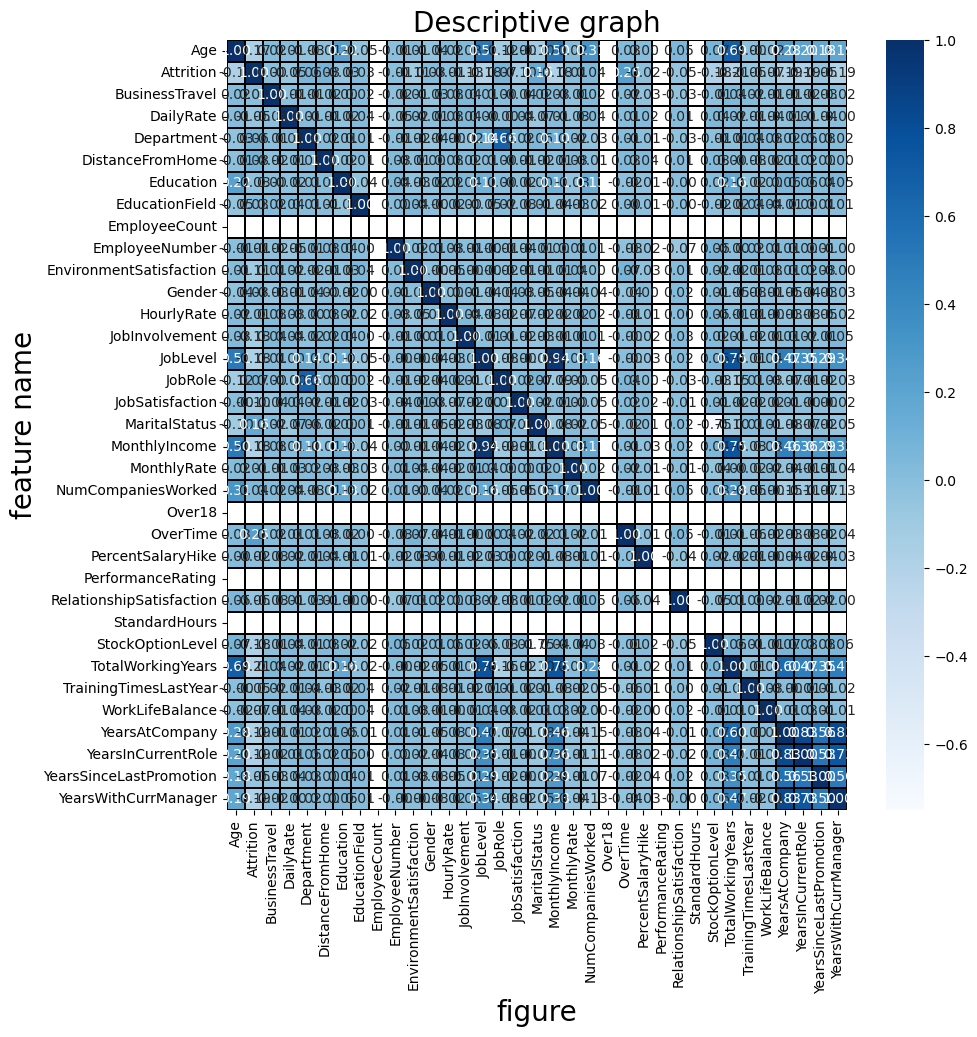

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

We can see most of the features are highly correlated with each other so some features must be dropped to prevent overfitting

In [21]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features=correlation(df,0.9)

In [23]:
print(corr_features)

{'MonthlyIncome'}


In [24]:
df_new=df.drop(['MonthlyIncome'],axis=1)

In [25]:
df_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,6.403124,1,2,33.196385,2,1.000000,1.414214,1,1.0,1.000000,...,1.000000,8.944272,0.0,2.828427,0.707107,1.000000,2.449490,2.000000,0.000000,2.236068
1,7.000000,0,1,16.703293,1,2.828427,1.000000,1,1.0,1.414214,...,2.000000,8.944272,1.0,3.162278,1.732051,1.732051,3.162278,2.645751,1.000000,2.645751
2,6.082763,1,2,37.054015,1,1.414214,1.414214,4,1.0,2.000000,...,1.414214,8.944272,0.0,2.645751,1.732051,1.732051,0.000000,0.000000,0.000000,0.000000
3,5.744563,0,1,37.309516,1,1.732051,2.000000,1,1.0,2.236068,...,1.732051,8.944272,0.0,2.828427,1.732051,1.732051,2.828427,2.645751,1.732051,0.000000
4,5.196152,0,2,24.310492,1,1.414214,1.000000,3,1.0,2.645751,...,2.000000,8.944272,1.0,2.449490,1.732051,1.732051,1.414214,1.414214,1.414214,1.414214


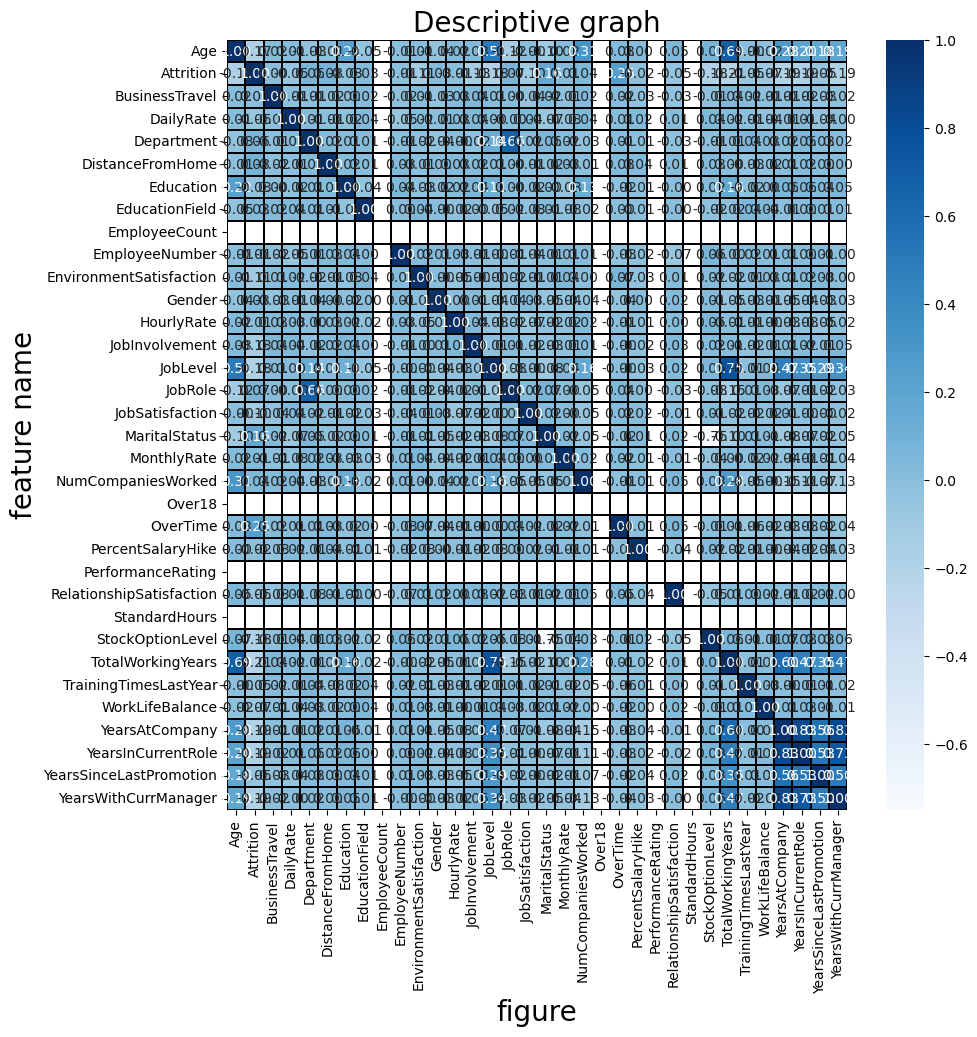

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

So correlation between features are rectified

***CLASSIFICATION***

***Checking of correlation with the target***

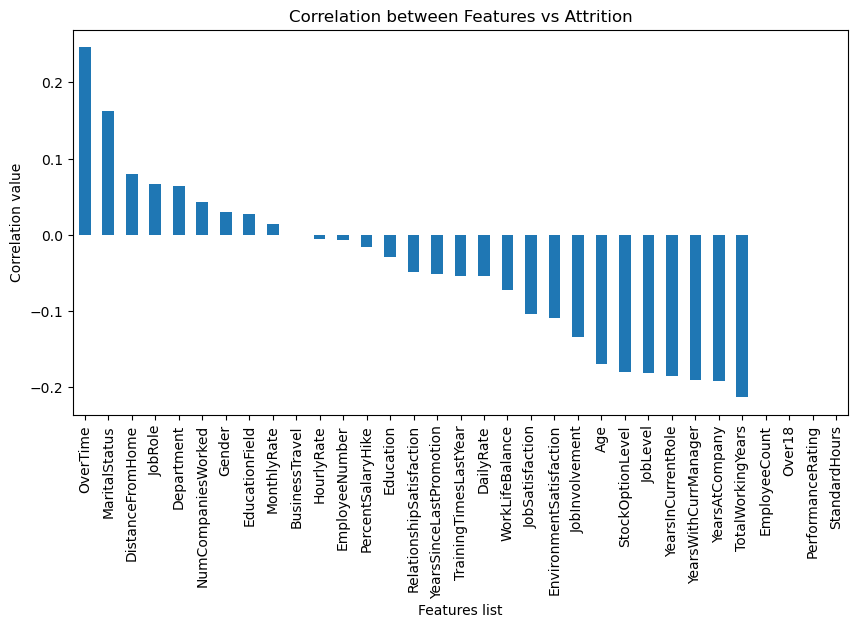

In [27]:
df_corr=df_new.corr()
plt.figure(figsize=(10,5))
df_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation between Features vs Attrition")
plt.xlabel('Features list')
plt.ylabel('Correlation value')
plt.show()

In [28]:
df_new.drop(['BusinessTravel','HourlyRate','EmployeeNumber'],axis=1,inplace=True)

***Splitting of data into features and target***

In [29]:
x=df_new.drop('Attrition',axis=1)
y=df_new['Attrition']

***Scaling or standardization of parameters***

In [31]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 0.49819239,  0.76605804,  1.40151234, ...,  0.21973509,
        -1.03664477,  0.47785486],
       [ 1.29560194, -1.35526098, -0.49381714, ...,  0.84619977,
         0.00209019,  0.8705127 ],
       [ 0.07019798,  1.26222106, -0.49381714, ..., -1.72053097,
        -1.03664477, -1.6652873 ],
       ...,
       [-1.11428866, -1.90232664, -0.49381714, ..., -0.34855568,
        -1.03664477, -0.00521652],
       [ 1.29560194,  0.61017044,  1.40151234, ...,  0.65579994,
        -1.03664477,  1.04559693],
       [-0.26621408, -0.28044198, -0.49381714, ..., -0.04021127,
         0.00209019, -0.30984518]])

***Find the best random score***

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV


In [43]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.9211956521739131
random state  976


In [44]:
def classify(clf,X,y):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=976)
        
        #train the model
        clf.fit(x_train,y_train)
        
        #predicting Ytest
        pred=clf.predict(x_test)
        
        #accuracy score
        acc_score=accuracy_score(y_test,pred)
        print("Accuracy score",acc_score)
        
        #confusion matrix
        print("Confusion matrix :\n",confusion_matrix(y_test,pred))
        
        #classification report
        print("Classification report :\n",classification_report(y_test,pred))
        
        #cross validation score
        cv_score=(cross_val_score(clf,x,y,cv=5).mean())
        print("cross validation score ",cv_score)
        
        #Result of accuracy minus cv scores
        result=acc_score-cv_score
        print("The final result of accuracy minus cross validation is ",result)

In [45]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy score 0.9211956521739131
Confusion matrix :
 [[314   2]
 [ 27  25]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       316
           1       0.93      0.48      0.63        52

    accuracy                           0.92       368
   macro avg       0.92      0.74      0.79       368
weighted avg       0.92      0.92      0.91       368

cross validation score  0.8714285714285716
The final result of accuracy minus cross validation is  0.04976708074534153


In [46]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy score 0.7853260869565217
Confusion matrix :
 [[268  48]
 [ 31  21]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       316
           1       0.30      0.40      0.35        52

    accuracy                           0.79       368
   macro avg       0.60      0.63      0.61       368
weighted avg       0.81      0.79      0.80       368

cross validation score  0.7904761904761904
The final result of accuracy minus cross validation is  -0.005150103519668714


In [47]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy score 0.8913043478260869
Confusion matrix :
 [[316   0]
 [ 40  12]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       316
           1       1.00      0.23      0.38        52

    accuracy                           0.89       368
   macro avg       0.94      0.62      0.66       368
weighted avg       0.90      0.89      0.86       368

cross validation score  0.8551020408163265
The final result of accuracy minus cross validation is  0.03620230700976046


In [48]:
clf=AdaBoostClassifier()
classify(clf,X,y)

Accuracy score 0.9021739130434783
Confusion matrix :
 [[307   9]
 [ 27  25]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       316
           1       0.74      0.48      0.58        52

    accuracy                           0.90       368
   macro avg       0.83      0.73      0.76       368
weighted avg       0.89      0.90      0.89       368

cross validation score  0.8693877551020407
The final result of accuracy minus cross validation is  0.03278615794143758


In [49]:
clf=GradientBoostingClassifier()
classify(clf,X,y)

Accuracy score 0.8804347826086957
Confusion matrix :
 [[309   7]
 [ 37  15]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       316
           1       0.68      0.29      0.41        52

    accuracy                           0.88       368
   macro avg       0.79      0.63      0.67       368
weighted avg       0.86      0.88      0.86       368

cross validation score  0.863265306122449
The final result of accuracy minus cross validation is  0.01716947648624667


In [50]:
clf=SVC()
classify(clf,X,y)

Accuracy score 0.9021739130434783
Confusion matrix :
 [[316   0]
 [ 36  16]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       316
           1       1.00      0.31      0.47        52

    accuracy                           0.90       368
   macro avg       0.95      0.65      0.71       368
weighted avg       0.91      0.90      0.88       368

cross validation score  0.8387755102040817
The final result of accuracy minus cross validation is  0.06339840283939657


In [51]:
clf=KNeighborsClassifier()
classify(clf,X,y)

Accuracy score 0.875
Confusion matrix :
 [[313   3]
 [ 43   9]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       316
           1       0.75      0.17      0.28        52

    accuracy                           0.88       368
   macro avg       0.81      0.58      0.61       368
weighted avg       0.86      0.88      0.84       368

cross validation score  0.8333333333333333
The final result of accuracy minus cross validation is  0.04166666666666674


So out of the above models the SVC classifier gives the best results,the recall value is high for this model the hyperparamter tuning is done.

***Hyperparameter tuning***

In [53]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=976)
model = SVC()

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid search to the data
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (accuracy):", grid_search.best_score_)

Best parameters: {'C': 1, 'coef0': 0.1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Best score (accuracy): 0.8475359934183464


In [54]:
best_model = SVC(C= 1, coef0= 0.5, degree= 3, gamma= 'auto', kernel= 'poly')

best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print("accuracy score",accuracy_score(y_test,y_pred))

accuracy score 0.9130434782608695


In [55]:
import joblib

joblib.dump(best_model, 'Baseball.joblib')

['Baseball.joblib']

In [56]:
loaded_model = joblib.load('Baseball.joblib')